# Hierarchical clustering on the Planted Model with Actively Obtained Quadruplets

In the reference paper  we use a planted model to investigate our methods. Here, we show how we can use ComparisonHC to learn a dendrogram on this planted model.

## Imports
We start by importing the ComparisonHC class, the core of the method.

In [1]:
from comparisonhc import ComparisonHC

Then we choose an oracle from the module oracle. Here, we settle for a active oracle with a limited budget, that is an oracle which will answer all the queries until its budget is reached.

In [2]:
from comparisonhc.oracle import OracleActiveBudget

We also need to choose the linkage used by ComparisonHC. Here, we choose the kernel average linkage that uses a quadruplets kernel (4K-AL in the reference paper).

In [3]:
from comparisonhc.linkage import OrdinalLinkageKernel

To generate the data of the planted model we use the code provided in resources.

In [4]:
import sys
sys.path.append("../resources/")
from utils import planted_model

Finally we import numpy for array manipulations and matplotlib.pyplot to visualize the similarity matrix.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## The Planted Model

To generate data for our planted model we use the code provided in resources. We use pure clusters of size 30, 3 levels, an expected similarity between pairs belonging to a pure cluster of 0.8, a separation across consecutive levels of 0.2, and a standard deviation of 0.1 for the similarities. We plot the noisy similarity matrix that we obtain.

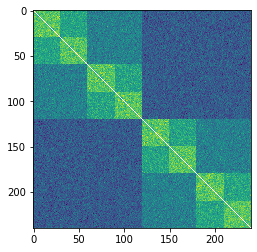

In [6]:
clusters, dendrogram_truth, similarities = planted_model(n_examples_pure=30,levels=3,mu=0.8,delta=0.2,sigma=0.1)

n = similarities.shape[0]

plt.figure()
plt.imshow(similarities)
plt.show()

## Initializing ComparisonHC

### Oracle

To initialize ComparisonHC we start by creating an oracle exhibiting three methods to access the quadruplets, comparisons, comparisons_to_ref, and comparisons_single. Here we chose an active oracle with limited budget. The budget is controlled by a proportion of quadruplets that can be queried. We assume that we have access to $10\%$ of the quadruplets.

Note that normally the oracle uses the data x and a metric to generate the quadruplets. Here, we already have acces to the precomputed similarity matrix which explains why we have to use a slightly more complicated initialization.

In [7]:
x = np.arange(n).reshape(-1,1)
metric = lambda a,b: similarities[a.ravel(),:][:,b.ravel()]
oracle = OracleActiveBudget(x,metric=metric,proportion_quadruplets=0.1)

### Linkage

We also need to create the linkage object that will be used to merge the clusters. This object exhibits a single method called closest_clusters that can be used to choose which clusters to merge next. We use a kernel average linkage that uses a quadruplets kernel.

In [8]:
linkage = OrdinalLinkageKernel(oracle)

### ComparisonHC

We can now create the main ComparisonHC object using the linkage defined above.

In [9]:
chc = ComparisonHC(linkage)

## Learning the Dendrogram

To learn a dendrogram we need to use the fit method from ComparisonHC with initial clusters. Here, we start with one example per cluster.

In [10]:
chc.fit([[i] for i in range(n)])

print("ComparisonHC ran for {:.2f} seconds.".format(chc.time_elapsed))

ComparisonHC ran for 34.74 seconds.


## Evaluating the Dendrogram

To evaluate the performance or the learned dendrogram we can use the average adjusted rand index since, in this particular case, we have acces to the ground truth dendrogram. We consider the top 3 levels since we chose a planted model with 3 levels.

In [11]:
score_chc = chc.average_ARI(3,dendrogram_truth,clusters)

print("ComparisonHC learned a dendrogram with an average ARI of {:.2f}.".format(score_chc))

ComparisonHC learned a dendrogram with an average ARI of 1.00.
